In [12]:
%%time
import models as md

CPU times: total: 1min 30s
Wall time: 1min 31s


In [18]:
import yelp_query
import numpy as np
import matplotlib.pyplot as plt

In [19]:
business_id, reviews = yelp_query.get_reviews(
    name = "Super Bowl",
    address="719 W William Cannon Dr Ste 103"
)

Business found: Super Bowl


In [22]:
review_features = md.review_list_2vec(reviews)
features = md.agg_features(review_features)
score = md.model.predict(features)

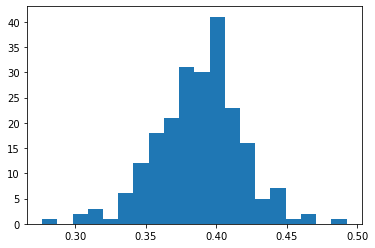

In [21]:
import matplotlib.pyplot as plt
plt.hist(review_features.both_sim,bins=20)
plt.show()

In [16]:
all_predicted_scores = np.loadtxt('data/processed data/predicted_business_insp_scores.csv', delimiter=',')

Cleaner than 2.31% of all restaurants!


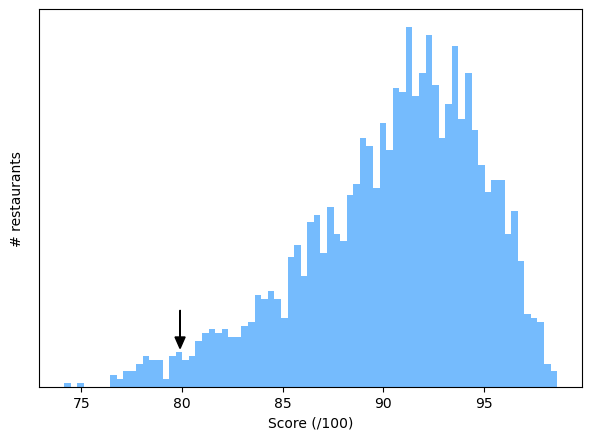

In [145]:
# plot 
percentile = sum(all_predicted_scores < score)/len(all_predicted_scores)*100
print('Cleaner than {:.2f}% of all restaurants!'.format(percentile))
fig = plt.figure(figsize=(7,5),dpi=100)
bin_y, bin_x, bars = plt.hist(all_predicted_scores,bins=75,alpha=1,color='xkcd:sky blue')
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.axes.tick_params('y',left=False)
# plt.axvline(x=score,color='black')
bin_height = min(bin_y[np.argmin(np.abs(bin_x-score))],80)
plt.arrow(score, bin_height+13, 0, -10, length_includes_head=True,
          head_width=0.5, head_length=3, color='black')
plt.xlabel('Score (/100)')
plt.ylabel('# restaurants')
plt.show()